In [1]:
# pip install --upgrade xarray seaborn pandas numpy

In [1]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

# ERP Analysis With Pandas And Seaborn

# Overview

In these exercises, we'll delve into the analysis and visualization of Local Field Potential (LFP) data originating from various brain regions. Leveraging Pandas, we'll aggregate and manipulate the data to facilitate a comparison of LFP signal patterns among these brain areas. Subsequently, we'll employ Seaborn to craft compelling figures for result visualization.

## Load dataset

In this section, we'll work with a dataset from a single session recording of Cori the mouse ('steinmetz_2016-12-14_Cori.nc'). Our primary objective is to read this data and convert it into a Pandas dataframe, which will serve as the foundation for the subsequent exercises.

**Load dataset and convert to Pandas dataframe:**

- **xarray:** 
  - `dset = xr.load_dataset('file.nc')`: Loads a dataset from a specified file path using the xarray library. It facilitates data manipulation and analysis of multi-dimensional arrays.
  - `to_dataframe()`: Converts the loaded xarray dataset into a Pandas DataFrame for easier data manipulation and analysis.

- **Pandas**
  - df.reset_index(): resets the index of the DataFrame, turning the current index into a new column and creating a default integer index

**Example** Read 'steinmetz_2016-12-14_Cori.nc' data using `xarray` and see what's in there!

In [3]:
dset = xr.load_dataset('steinmetz_2016-12-14_Cori.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

Nice! It has many data variables including lfp. Let's look at an example on how to extract a data variable into a Pandas dataframe

**Example** Extract 'brain_area' data variable to Pandas dataframe and store it in ba variable

In [13]:
ba = dset['brain_area'].to_dataframe()
ba

,brain_area
cell,
1,ACA
2,MOs
3,ACA
4,LS
5,MOs
...,...
730,SUB
731,DG
732,DG


Hmm! It might be good to have a separate index instead of using cell

**Example** reset_index of ba and display first five rows of the data

In [15]:
ba = ba.reset_index()
ba.head(5)

,cell,brain_area
0,1,ACA
1,2,MOs
2,3,ACA
3,4,LS
4,5,MOs


Great! Now, let's do this to the data we are actually going to use for the exercises

Convert 'lfp' data to Pandas dataframe and store it in lfp variable

In [9]:
lfp = dset['lfp'].to_dataframe()
lfp

lfp
brain_area_lfp trial time           
ACA            1     0.01  -2.850794
                     0.02  -4.039683
                     0.03  -4.195238
                     0.04  -3.228571
                     0.05   0.460317
...                              ...
VISp           364   2.46   6.761410
                     2.47  11.952319
                     2.48  15.552319
                     2.49  16.043228
                     2.50   5.570501

[637000 rows x 1 columns]

Reset index of lfp and display first 5 rows

In [16]:
lfp = lfp.reset_index()
lfp.head(5)

,index,brain_area_lfp,trial,time,lfp
0,0,ACA,1,0.01,-2.850794
1,1,ACA,1,0.02,-4.039683
2,2,ACA,1,0.03,-4.195238
3,3,ACA,1,0.04,-3.228571
4,4,ACA,1,0.05,0.460317


## Section 1: Exploring and Visualizing LFP Data for VISp Area

In **Section 1**, the notebook explores LFP data from the 'VISp' brain area. It performs data indexing, visualization, and basic statistics, aiding the understanding of the LFP signal characteristics for one trial.


**Libraries Used:**

- **matplotlib:**
  - `plt.plot()`: Plot data on the current axes.
  - `plt.xlabel()`: Set the x-axis label for the current axes.
  - `plt.ylabel()`: Set the y-axis label for the current axes.
  - `plt.title()`: Set a title for the current axes.


- **Pandas:**
  - `df[df.col_1 == 'val_1']`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1'.
  - `df[(df.col_1 == 'val_1') & (df.col_2 == number)]`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1' and 'col_2' equals a specified number.
  - `plt.axhline()`: Add a horizontal line to the plot at a specified y-value.


**Exercises**

Reset index of `lfp` and name the resulting dataframe as `df`

In [4]:
df = lfp.reset_index()

Display rows from VISp brain area

In [5]:
df[df.brain_area_lfp == 'VISp']

,brain_area_lfp,trial,time,lfp
546000,VISp,1,0.01,1.127644
546001,VISp,1,0.02,-5.854174
546002,VISp,1,0.03,-7.717811
546003,VISp,1,0.04,-11.745083
546004,VISp,1,0.05,-1.735993
...,...,...,...,...
636995,VISp,364,2.46,6.761410
636996,VISp,364,2.47,11.952319
636997,VISp,364,2.48,15.552319
636998,VISp,364,2.49,16.043228


Display only first trial rows of VISp area

In [5]:
df[(df.brain_area_lfp == 'VISp') & (df.trial == 1)]

,brain_area_lfp,trial,time,lfp
546000,VISp,1,0.01,1.127644
546001,VISp,1,0.02,-5.854174
546002,VISp,1,0.03,-7.717811
546003,VISp,1,0.04,-11.745083
546004,VISp,1,0.05,-1.735993
...,...,...,...,...
546245,VISp,1,2.46,10.591280
546246,VISp,1,2.47,5.900371
546247,VISp,1,2.48,10.945826
546248,VISp,1,2.49,5.782189


Plot first trial lfp of VISp

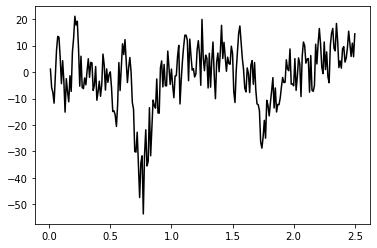

In [6]:
vis_1_trial = df[(df.brain_area_lfp == 'VISp') & (df.trial == 1)]
plt.plot(vis_1_trial.time.to_numpy(), vis_1_trial.lfp.to_numpy(), color='k')

Add x-axis and y-axis labels along with a title

Text(0.5, 1.0, 'VISp Trial 1: LFP')

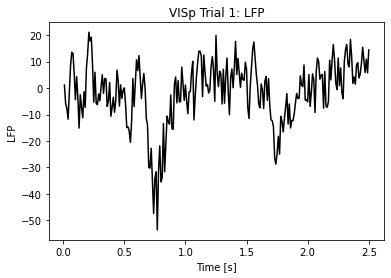

In [7]:
vis_1_trial = df[(df.brain_area_lfp == 'VISp') & (df.trial == 1)]
plt.plot(vis_1_trial.time.to_numpy(), vis_1_trial.lfp.to_numpy(), color='k')
plt.xlabel('Time [s]')
plt.ylabel('LFP')
plt.title('VISp Trial 1: LFP')

Find mean, median, std, min, and, max of LFP of the first trial of VISp area

In [9]:
vis_1_trial.lfp.mean(), vis_1_trial.lfp.median(), vis_1_trial.lfp.std(), vis_1_trial.lfp.min(), vis_1_trial.lfp.max()

(-1.718974397031533,
 0.21855287569573534,
 11.999749240965915,
 -53.61781076066791,
 21.109461966604826)

Add a dashed horizontal line in red at mean LFP value

Text(0.5, 1.0, 'VISp LFP: Trial 1')

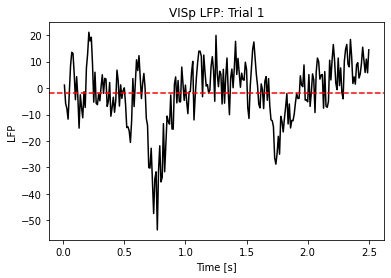

In [10]:
vis_1_trial = df[(df.brain_area_lfp == 'VISp') & (df.trial == 1)]
plt.plot(vis_1_trial.time.to_numpy(), vis_1_trial.lfp.to_numpy(), color='k')
plt.axhline(vis_1_trial.lfp.mean(), color='r', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('LFP')
plt.title('VISp LFP: Trial 1')

## Section 2: Visualizing LFP Data for All Trials in VISp Area

**Section 2** extends this analysis to include all trials within the 'VISp' area. It calculates statistics such as the minimum and maximum LFP values, offering a comprehensive view of the LFP variability.


**Libraries Used:**
- **matplotlib:**
  - `plt.plot()`: Plot data on the current axes.
  - `plt.xlabel()`: Set the x-axis label for the current axes.
  - `plt.ylabel()`: Set the y-axis label for the current axes.
  - `plt.title()`: Set a title for the current axes.

- **Pandas:**
  - `df[df.col_1 == 'val_1']`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1'.
  - `df.col.min()`: Find the minimum value of 'col' in the 'df' DataFrame.
  - `df.col.max()`: Find the maximum value of 'col' in the 'visp' DataFrame.

**Exercises**

Create a dataframe with all rows from VISp brain area and call it visp

In [11]:
visp = df[df.brain_area_lfp == 'VISp']

What is the minimum trial number in visp?

In [12]:
visp.trial.min()

1

What is the maximum trial number in visp?

In [13]:
visp.trial.max()

364

Display min and max LFP for each trial in visp (round to two decimal points)

In [14]:
for trial_num in range(1, 364):
    min_lfp = visp[visp.trial == trial_num]['lfp'].min()
    max_lfp = visp[visp.trial == trial_num]['lfp'].max()
    print(f"{trial_num}, {np.round(min_lfp, 2)}, {np.round(max_lfp, 2)}")

1, -53.62, 21.11
2, -33.82, 28.57
3, -63.03, 29.13
4, -32.82, 30.37
5, -40.67, 38.79
6, -21.28, 36.18
7, -45.46, 36.68
8, -40.98, 49.22
9, -64.12, 30.31
10, -47.59, 33.88
11, -34.0, 43.72
12, -44.44, 19.65
13, -57.91, 35.88
14, -35.27, 42.02
15, -32.26, 39.29
16, -49.3, 43.75
17, -36.99, 60.84
18, -35.86, 30.52
19, -30.99, 46.28
20, -25.35, 41.53
21, -42.38, 52.56
22, -21.05, 38.11
23, -76.31, 67.85
24, -47.27, 45.99
25, -45.73, 36.48
26, -50.08, 29.12
27, -22.52, 39.86
28, -46.03, 40.3
29, -46.81, 37.1
30, -79.79, 59.51
31, -74.33, 67.34
32, -36.54, 43.19
33, -68.0, 55.75
34, -23.78, 54.26
35, -52.94, 56.68
36, -72.08, 62.02
37, -39.27, 39.72
38, -51.52, 41.11
39, -34.28, 42.41
40, -67.51, 42.09
41, -49.92, 63.47
42, -28.83, 48.59
43, -37.94, 31.27
44, -43.88, 39.92
45, -44.56, 55.83
46, -26.26, 60.81
47, -66.37, 59.33
48, -39.81, 40.88
49, -57.85, 30.39
50, -36.18, 32.34
51, -39.99, 34.45
52, -31.07, 36.95
53, -40.24, 34.31
54, -62.15, 30.24
55, -54.06, 46.76
56, -31.83, 31.88
57, -3

Plot LFP from all trials (VISp area)

Text(0.5, 1.0, 'VISp LFP: all trials')

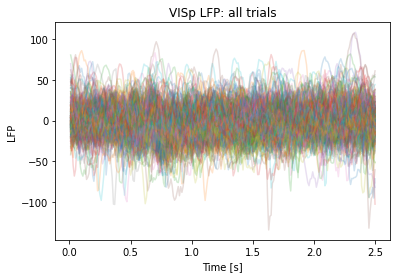

In [15]:
min_trial_num = visp.trial.min()
max_trial_num = visp.trial.max()
for trial_num in range(min_trial_num, max_trial_num+1):
    trial_visp = visp[visp.trial == trial_num]
    plt.plot(trial_visp.time.to_numpy(), trial_visp.lfp.to_numpy(), alpha=0.2)
plt.xlabel('Time [s]')
plt.ylabel('LFP')
plt.title('VISp LFP: all trials')

## Section 3: Analyzing and Visualizing Average LFP Data

**Section 3** widens the scope to encompass all brain areas. It calculates mean LFP values for each brain area and explores mean LFP within time bins across trials. The data is presented through line plots and a facet grid, offering insights into LFP behavior across multiple brain areas.


**Libraries Used:**
- **seaborn:**
  - `sns.lineplot()`: Create a line plot of data, with options for confidence intervals.
  - `sns.FacetGrid()`: Create a grid of subplots based on categories, useful for comparing data across brain areas.

- **Pandas:**
  - `df.groupby(by='col_1')['col_3'].mean()`: Calculate the mean of col_3 for each category in col_1.
  - `df.groupby(by=['col_1','col_2'])['col_3'].mean().reset_index()`: Compute the mean of col_3 for pairs of col_1 and col_2 categories.

**Exercises**

Find mean lfp in each brain area

In [16]:
df.groupby(by='brain_area_lfp')['lfp'].mean()

brain_area_lfp
ACA    -0.514545
CA3    -0.330150
DG      0.186883
LS     -0.244636
MOs    -0.440104
SUB    -0.595160
VISp   -0.885078
Name: lfp, dtype: float64

Find mean lfp in time bin across all trials for all brain areas

In [17]:
df.groupby(by=['brain_area_lfp','time'])['lfp'].mean().reset_index()

,brain_area_lfp,time,lfp
0,ACA,0.01,2.685471
1,ACA,0.02,3.209860
2,ACA,0.03,2.529335
3,ACA,0.04,1.884860
4,ACA,0.05,1.645758
...,...,...,...
1745,VISp,2.46,-2.188754
1746,VISp,2.47,-1.785507
1747,VISp,2.48,-1.664128
1748,VISp,2.49,-1.426965


Plot a line plot of mean lfp in each time bin across all trials for VISp area with confidence intervals

<Axes: xlabel='time', ylabel='lfp'>

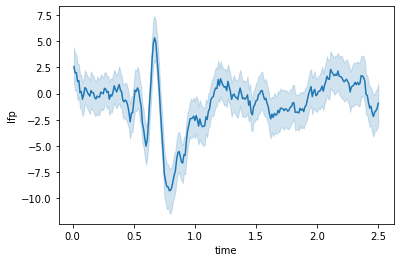

In [18]:
visp = df[df.brain_area_lfp == 'VISp']
sns.lineplot(data=visp, x='time', y='lfp', estimator=np.mean, errorbar='ci', err_style='band')

Plot the same for all brain areas in three columns

Hint: Use FacetGrid 

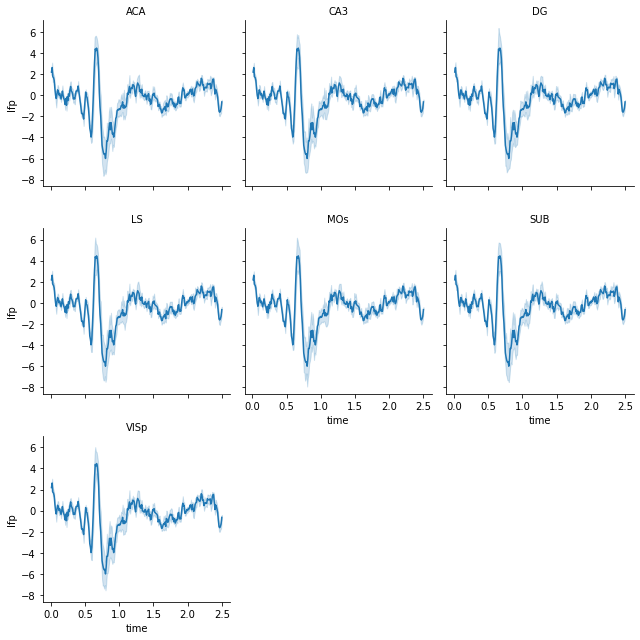

In [19]:
df_mean = df.groupby(by=['brain_area_lfp','time'])['lfp'].mean().reset_index()
g = sns.FacetGrid(df_mean, col='brain_area_lfp', col_wrap=3, sharex=True, sharey=True)
g.map(sns.lineplot, data=df_mean, x='time', y='lfp', estimator=np.mean, errorbar='ci', err_style='band', n_boot=100)
g.set_titles(col_template="{col_name}")

## Section 4: Visualizing Average LFP Data with Heatmap

Finally, **Section 4** transforms the data into a pivot table format, allowing for the creation of a heatmap. This heatmap provides a visual representation of the average LFP values per time bin across all trials and brain areas.

**Libraries Used:**
- **seaborn:**
  - `sns.heatmap()`: Create a heatmap visualization to display the mean LFP data using a color gradient.

- **Pandas:**
  - `df.pivot_table()`: Restructure the DataFrame to create a pivot table where rows represent 'brain_area_lfp,' columns represent 'time,' and values are the mean 'lfp.'

**Exercises**

Using `pivot_table` restructure df such that rows are `brain_area_lfp`, columns are `time`, and values are mean `lfp` 

In [7]:
df.groupby(['brain_area_lfp', 'time'])['lfp'].mean().unstack()

time,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50
brain_area_lfp,,,,,,,,,,,,,,,,,,,,,
ACA,2.685471,3.209860,2.529335,1.884860,1.645758,0.967400,0.379396,0.767064,0.746887,1.277259,...,1.500397,1.202992,0.766545,0.520117,-0.258943,-0.766727,-1.254212,-1.441269,-1.015720,-0.695543
CA3,1.629518,2.715249,0.921293,2.078533,1.577401,0.502660,-0.979725,-2.140682,-0.898762,-0.274732,...,0.523830,0.558090,0.804373,-0.148924,-0.979483,-1.787499,-1.612644,-1.523681,-1.815537,-0.997259
DG,2.856145,3.810049,0.956899,2.094294,2.304235,0.560752,-0.789523,-1.486271,-0.024381,0.018169,...,-0.381524,-0.424394,-0.055719,-0.466114,-1.583032,-1.889798,-2.485345,-2.341369,-2.132770,-1.018312
LS,1.720520,2.275740,1.694925,1.233181,0.944536,0.527159,0.375900,0.496161,0.811752,1.184257,...,1.192567,0.850740,0.275717,0.209463,-0.530762,-1.182547,-1.228083,-1.042186,-0.693559,-0.309539
MOs,1.733737,2.255798,1.747858,1.093847,0.884589,0.458545,0.264287,0.504369,0.316759,0.677858,...,1.070688,0.696952,0.319012,0.146512,-0.086345,-0.637883,-0.711565,-0.824916,-0.466098,-0.092499
SUB,2.083217,2.036742,2.304416,2.115268,1.226303,1.093702,0.492191,0.151257,-0.273056,0.103867,...,0.069480,0.792099,0.296312,-0.383038,-1.296088,-2.241097,-2.254512,-1.622324,-1.263761,-0.451261
VISp,2.590992,1.989468,2.007001,1.145337,1.241092,0.083449,0.207126,-0.535956,-0.108534,0.574958,...,-0.163704,-0.883659,-1.384658,-1.213079,-1.829013,-2.188754,-1.785507,-1.664128,-1.426965,-0.917550


In [6]:
df.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc=np.mean)

time,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50
brain_area_lfp,,,,,,,,,,,,,,,,,,,,,
ACA,2.685471,3.209860,2.529335,1.884860,1.645758,0.967400,0.379396,0.767064,0.746887,1.277259,...,1.500397,1.202992,0.766545,0.520117,-0.258943,-0.766727,-1.254212,-1.441269,-1.015720,-0.695543
CA3,1.629518,2.715249,0.921293,2.078533,1.577401,0.502660,-0.979725,-2.140682,-0.898762,-0.274732,...,0.523830,0.558090,0.804373,-0.148924,-0.979483,-1.787499,-1.612644,-1.523681,-1.815537,-0.997259
DG,2.856145,3.810049,0.956899,2.094294,2.304235,0.560752,-0.789523,-1.486271,-0.024381,0.018169,...,-0.381524,-0.424394,-0.055719,-0.466114,-1.583032,-1.889798,-2.485345,-2.341369,-2.132770,-1.018312
LS,1.720520,2.275740,1.694925,1.233181,0.944536,0.527159,0.375900,0.496161,0.811752,1.184257,...,1.192567,0.850740,0.275717,0.209463,-0.530762,-1.182547,-1.228083,-1.042186,-0.693559,-0.309539
MOs,1.733737,2.255798,1.747858,1.093847,0.884589,0.458545,0.264287,0.504369,0.316759,0.677858,...,1.070688,0.696952,0.319012,0.146512,-0.086345,-0.637883,-0.711565,-0.824916,-0.466098,-0.092499
SUB,2.083217,2.036742,2.304416,2.115268,1.226303,1.093702,0.492191,0.151257,-0.273056,0.103867,...,0.069480,0.792099,0.296312,-0.383038,-1.296088,-2.241097,-2.254512,-1.622324,-1.263761,-0.451261
VISp,2.590992,1.989468,2.007001,1.145337,1.241092,0.083449,0.207126,-0.535956,-0.108534,0.574958,...,-0.163704,-0.883659,-1.384658,-1.213079,-1.829013,-2.188754,-1.785507,-1.664128,-1.426965,-0.917550


Visualize the same with heatmap

<Axes: xlabel='time', ylabel='brain_area_lfp'>

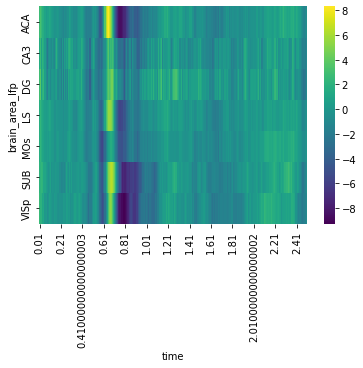

In [21]:
df_pivot = df.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc=np.mean)
sns.heatmap(df_pivot, cmap='viridis', xticklabels=20)